In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import numpy as np
import sys
import re
import pandas as pd
from glob import glob

path = '/Users/mark/Data/2_0_n-35-s/2_0_300-35-s.log'

In [2]:
F = re.compile(r'(-?\d+): (\[[0-9, ]+\]), (\d+), (.+)')  # Extract multicurves.

df = pd.DataFrame(
    [F.match(row).groups() for row in open(path, 'r') if F.match(row)],
    columns=['index', 'coordinate', 'num_components', 'topo']
    )

# Weight can be computed by taking the dot product of the coordinate // 2 and:
W = [3, 3, 4, 3, 3, 2, 3, 3, 3]
df['weight'] = df.coordinate.apply(lambda X: int(sum(x * y for x, y in zip([int(x) for x in X[1:-1].split(',')], W))) // 2)
df['sep'] = df.topo.str.match(r'\(\[\d,')

curves = df[df.num_components == '1']

dt = pd.DataFrame(
    [(k, len(ds), len(ds[ds.sep])) for k, ds in curves.groupby('weight')],
    columns=['weight', 'num', 'yes']
    )

dt['percent'] = dt.yes.cumsum() / dt.num.cumsum()
dt['log_percent'] = np.log(abs(dt.percent - 1.0 / 49.0))
dt['log_weight'] = np.log(dt.weight)

In [3]:
for _, row in dt.iterrows():
    print('weight <= {}: {:.3f}% (1 in {:.2f})'.format(row.weight, 100.0 * row.percent, 1.0 / row.percent if row.percent else -1))

weight <= 55.0: 0.000% (1 in -1.00)
weight <= 56.0: 0.000% (1 in -1.00)
weight <= 57.0: 0.000% (1 in -1.00)
weight <= 58.0: 0.000% (1 in -1.00)
weight <= 61.0: 0.000% (1 in -1.00)
weight <= 62.0: 0.000% (1 in -1.00)
weight <= 65.0: 0.000% (1 in -1.00)
weight <= 66.0: 0.000% (1 in -1.00)
weight <= 67.0: 0.000% (1 in -1.00)
weight <= 68.0: 0.000% (1 in -1.00)
weight <= 69.0: 0.000% (1 in -1.00)
weight <= 70.0: 0.000% (1 in -1.00)
weight <= 71.0: 0.000% (1 in -1.00)
weight <= 72.0: 0.000% (1 in -1.00)
weight <= 73.0: 0.000% (1 in -1.00)
weight <= 74.0: 0.000% (1 in -1.00)
weight <= 75.0: 0.000% (1 in -1.00)
weight <= 76.0: 0.000% (1 in -1.00)
weight <= 77.0: 0.000% (1 in -1.00)
weight <= 78.0: 0.000% (1 in -1.00)
weight <= 79.0: 0.000% (1 in -1.00)
weight <= 80.0: 0.000% (1 in -1.00)
weight <= 81.0: 0.000% (1 in -1.00)
weight <= 82.0: 0.962% (1 in 104.00)
weight <= 83.0: 0.870% (1 in 115.00)
weight <= 84.0: 0.813% (1 in 123.00)
weight <= 85.0: 0.704% (1 in 142.00)
weight <= 86.0: 0.645% (

weight <= 296.0: 1.947% (1 in 51.37)
weight <= 297.0: 1.902% (1 in 52.59)
weight <= 298.0: 1.965% (1 in 50.90)
weight <= 299.0: 1.920% (1 in 52.08)
weight <= 300.0: 1.950% (1 in 51.29)


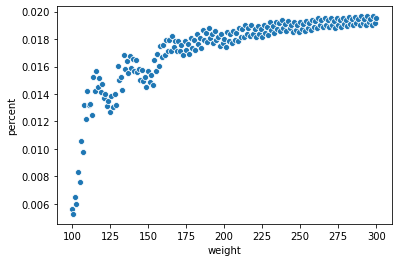

In [4]:
ds = dt[dt.weight >= 100]
sns.scatterplot(ds.weight, ds.percent)

(-2.0361749438474948, 4.675406918239497, 0.5593533618542196)

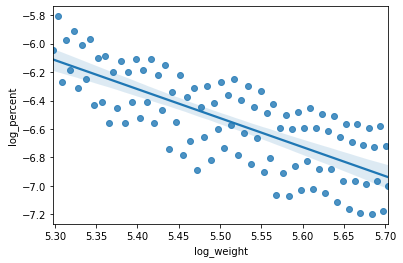

In [5]:
ds = dt[dt.weight >= 200]
sns.regplot(ds.log_weight, ds.log_percent)
slope, intercept, r_value, p_value, std_err = stats.linregress(ds.log_weight, ds.log_percent)
slope, intercept, r_value**2